# Documentation

Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory.

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_validate
import datetime

In [3]:
os.getcwd()

'C:\\Users\\Molly'

# Fit Models with Training Dataset

Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.

Best Model

In [4]:
expected_model_version = '1.0'
model_path = r'C:\Users\Molly\Desktop\Springboard Main Course\Chapter 6-Guided Capstone Project\data\models\ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [5]:
ski_data = pd.read_csv(r'C:\Users\Molly\Desktop\Springboard Main Course\Chapter 6-Guided Capstone Project\data\ski_data_step3_features.csv')

In [6]:
X = ski_data.loc[ski_data.Name != "Big Mountain Resort", model.X_columns]
y = ski_data.loc[ski_data.Name != "Big Mountain Resort", 'AdultWeekend']

In [7]:
len(X), len(y)

(276, 276)

In [8]:
model.fit(X, y)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=69, n_jobs=None,
                                      

In [9]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [10]:
cv_results['test_score']

array([-12.10337215,  -9.28661397, -11.41279578,  -8.06408169,
       -11.05864559])

In [11]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(10.3851018351214, 1.487015739861695)

# Review the results

Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the AdultWeekend lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.

In [13]:
#df[df['Name'].str.contains('Big Mountain')]

ski_data[ski_data['Name'].str.contains('Big Mountain')]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
124,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0,3,2,...,1.122778,8.161045,0.140121,0.129338,0.148148,0.84507,0.133333,0.004667,0.028571,0.001


In [14]:
X_bm = ski_data.loc[ski_data.Name == "Big Mountain Resort", model.X_columns]
y_bm = ski_data.loc[ski_data.Name == "Big Mountain Resort", 'AdultWeekend']

Predict the Big Mountain resort Adult Weekend price and print it out. This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [15]:
bm_pred = model.predict(X_bm).item()

In [19]:
print(f'Big Mountain Resort modelled price is ${bm_pred:.2f}.')

Big Mountain Resort modelled price is $94.22.


Print the Big Mountain resort actual Adult Weekend price.

In [20]:
y_bm = y_bm.values.item()

In [21]:
print(f'Big Mountain Resort actual price is ${y_bm:.2f}.')

Big Mountain Resort actual price is $81.00.


As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.

In [24]:
#clusters = ['vertical_drop', 'Snow Making_ac', 'total_chairs', 'fastQuads', 
           #  'Runs', 'LongestRun_mi', 'trams', 'SkiableTerrain_ac'] 

In [ ]:
#plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
#plt.xlabel('summit_elev')
#plt.ylabel('vertical_drop')
#plt.title('summit_elev by vertical_drop by cluster')
#plt.savefig('figures/fig1.png',bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Molly\\Desktop\\Springboard Main Course\\Chapter 6-Guided Capstone Project\\figures\\fig1.png'

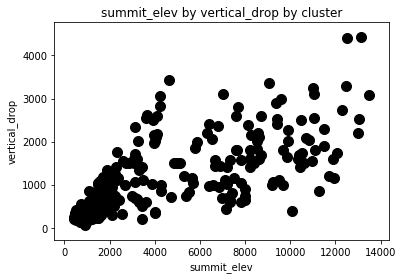

In [33]:
plt.scatter(ski_data['summit_elev'], ski_data['vertical_drop'], c=ski_data['AdultWeekend'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ski_data['summit_elev'], ski_data['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('C:\\Users\\Molly\\Desktop\\Springboard Main Course\\Chapter 6-Guided Capstone Project\\figures\\fig1.png',bbox_inches='tight')

# Finalize Code

Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale! Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.

In [ ]:
#import pickle
#s = pickle.dumps(model)
#from joblib import dump, load
#dump(model, 'models/regression_model_adultweekend.joblib')

In [40]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'C:\\Users\\Molly\\Desktop\\Springboard Main Course\\Chapter 6-Guided Capstone Project\\data\\models\\regression_model_adultweekend.joblib')

['C:\\Users\\Molly\\Desktop\\Springboard Main Course\\Chapter 6-Guided Capstone Project\\data\\models\\regression_model_adultweekend.joblib']

# Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.

In [ ]:
### Need clarity here